In [146]:
import numpy as np
import matplotlib.pyplot as plt

# set plotsize
plt.rcParams['figure.figsize'] = [15, 10]

topics= [
    {'topic_description':'Mondgrundstücke für alle. Dank 49€ Ticket kann Sozialbau auch außerhalb der Städte statffinden.', 'topicId':'ID0'},
    {'topic_description': 'Warum jeder Bürger einen persönlichen Lobbyisten braucht', 'topicId': 'ID1'},
    {'topic_description': 'Krawattenpflicht für Hauskatzen - Ein Schritt für die Tierdisziplin', 'topicId': 'ID2'},
    {'topic_description': 'Steuern auf virtuelle Güter in Videospielen - Die neue Einnahmequelle für den Staat', 'topicId': 'ID3'},
    {'topic_description': 'Die Mauer um das Internet - Schutz vor fremden Datenströmen', 'topicId': 'ID4'},
    {'topic_description': 'Der neue Feiertag: Nationaler Tag des Sofa-Protests', 'topicId': 'ID5'},
    {'topic_description': 'Pflicht-Pausenclowns in jeder Behörde zur Steigerung der Amtsfreude', 'topicId': 'ID6'},
    {'topic_description': 'Windmühlen im Garten - Pflicht zur persönlichen Energiewende', 'topicId': 'ID7'},
    {'topic_description': 'Staatlich geförderte Selfie-Stunden für mehr Selbstliebe', 'topicId': 'ID8'},
    {'topic_description': 'Der Einsatz von Superhelden in der Verbrechensbekämpfung', 'topicId': 'ID9'},
    {'topic_description': 'Die Einführung von Ironie als zweite Amtssprache', 'topicId': 'ID10'},
    {'topic_description': 'Rechtsverkehr auf Gehwegen', 'topicId': 'ID11'},
    {'topic_description': 'Lebensmittel nur noch in Pillenform. Mit weniger kochen zur Energiewende', 'topicId': 'ID12'},
    {'topic_description': 'Sauerstoffsteuer - Jeder Atemzug zahlt', 'topicId': 'ID13'},
    {'topic_description': 'Politiker-Duelle nur noch im Reality-TV - Wer überlebt die Insel?', 'topicId': 'ID14'},
    {'topic_description': 'Gladiatorenkämpfe zwischen Parteien - Wahlkampf neu gedacht', 'topicId': 'ID15'},
    {'topic_description': 'Die Einrichtung von Botschafterposten in Westeros', 'topicId': 'ID16'}
]


def get_importance(length, max_importance, noise_std=0.25):
    last_val = length- 1

    # calc polynomial
    a = -4*max_importance/(last_val**2)
    b = -last_val*a

    arr = np.arange(length)
    arr = a*arr**2 + b*arr

    noise = np.random.normal(0,noise_std,length)
    noise = noise.cumsum()
    noise -= noise.mean()
    arr += noise
    arr[arr < 0] = 0
    return arr 

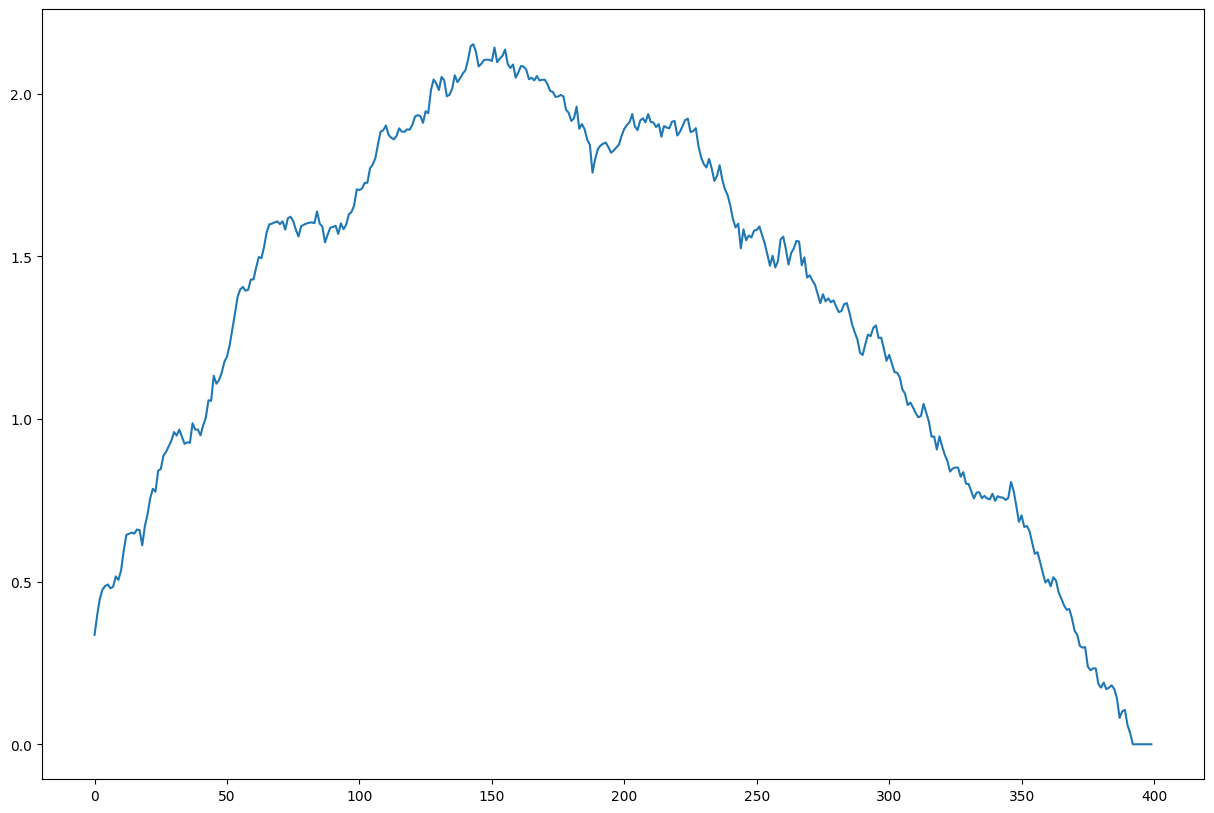

In [147]:
fig = plt.figure()
y = get_importance(400,2,0.025)
plt.plot(y)

In [148]:
import numpy as np
import pandas as pd
from datetime import datetime

# Define today's date
today = datetime.today()

# Define the start date as two years from today's date
start_date = today.replace(year=today.year - 2)

# Use pandas to create the date range
date_range = pd.date_range(start=start_date, end=today, freq='B', normalize=True)  # 'B' is for business days

# Invert the dictionary to create tuples
column_tuples = [(topic['topic_description'], topic['topicId']) for topic in topics]

# Create a MultiIndex from the tuples
multiindex_columns = pd.MultiIndex.from_tuples(column_tuples, names=["Topic", "Topic ID"])

# Create an empty Dataframe
mockup_data = pd.DataFrame(index=date_range, columns=multiindex_columns)

len_mockup_data = mockup_data.shape[0]

topic length:  101
upper lim:  11.31573896353167
start index:  -38


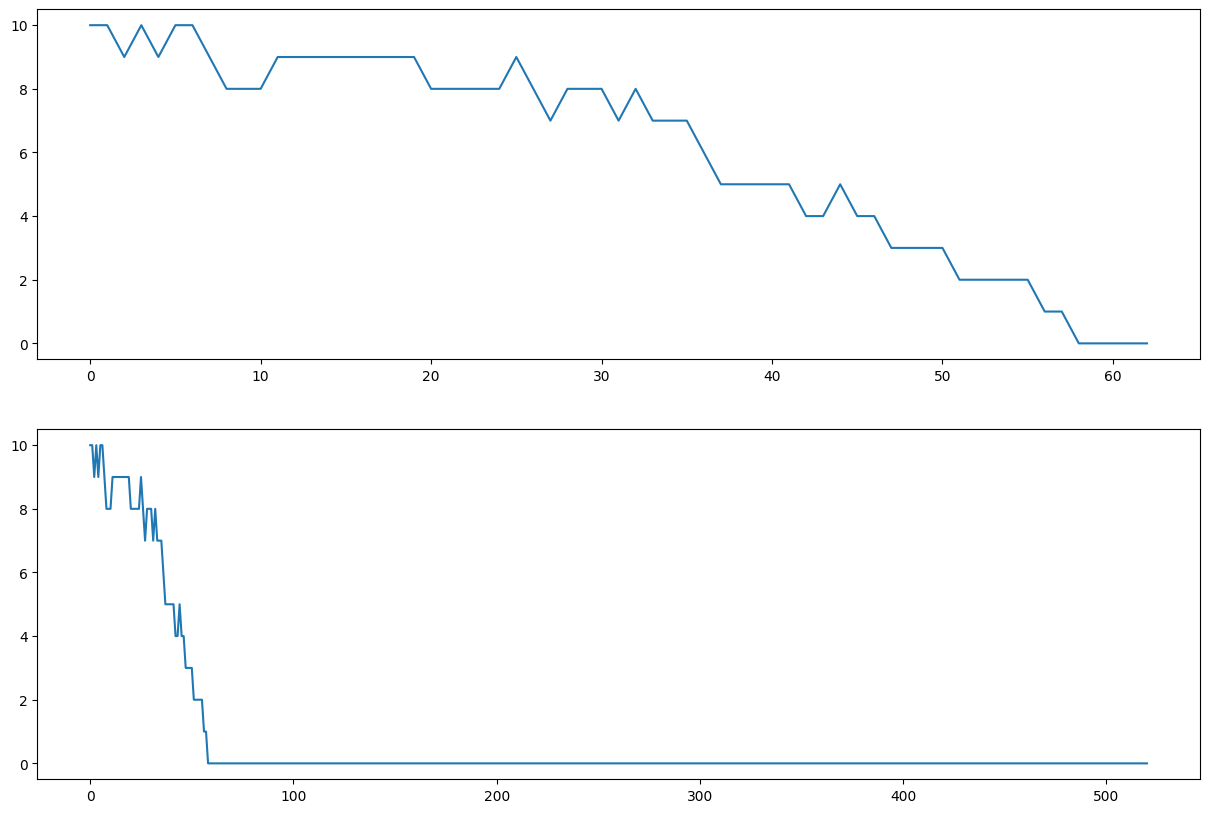

In [149]:
def get_mentions(len_data, verbose=False):

    start_index = np.random.randint(-len_data/3,(5/6)*len_data)
    topic_length = np.random.randint(len_data/8,len_data/2)

    lower_lim = 5
    upper_lim = lower_lim + 0.5 + topic_length*30/len_data
    topic_mentions_max = np.random.randint(lower_lim, upper_lim)

    if (verbose):
        print("topic length: ",topic_length)
        print("upper lim: ",upper_lim)
        print("start index: ",start_index)


    mentions_curve = get_importance(topic_length,topic_mentions_max,0.5)
    mentions = np.zeros(len_data)

    if start_index < 0:
        mentions_curve = mentions_curve[-start_index:]
        start_index = 0

    end_index = start_index + len(mentions_curve)

    end_diff = len(mentions) - end_index

    if end_diff < 0:
        new_len = len(mentions_curve) + end_diff
        mentions_curve = mentions_curve[:new_len]

    mentions[start_index:end_index] = mentions_curve

    mentions = mentions.astype(np.int8)

    if (verbose):
        fig = plt.figure()
        ax1 = fig.add_subplot(2,1,1)
        plt.plot(mentions_curve.astype(np.int8))
        ax2 = fig.add_subplot(2,1,2)
        plt.plot(mentions)
        
    return mentions

mentions = get_mentions(len_mockup_data, verbose=True)

In [150]:
for column in mockup_data.columns:    
    mockup_data[column] = get_mentions(len_mockup_data)

mockup_data 

Topic,Mondgrundstücke für alle. Dank 49€ Ticket kann Sozialbau auch außerhalb der Städte statffinden.,Warum jeder Bürger einen persönlichen Lobbyisten braucht,Krawattenpflicht für Hauskatzen - Ein Schritt für die Tierdisziplin,Steuern auf virtuelle Güter in Videospielen - Die neue Einnahmequelle für den Staat,Die Mauer um das Internet - Schutz vor fremden Datenströmen,Der neue Feiertag: Nationaler Tag des Sofa-Protests,Pflicht-Pausenclowns in jeder Behörde zur Steigerung der Amtsfreude,Windmühlen im Garten - Pflicht zur persönlichen Energiewende,Staatlich geförderte Selfie-Stunden für mehr Selbstliebe,Der Einsatz von Superhelden in der Verbrechensbekämpfung,Die Einführung von Ironie als zweite Amtssprache,Rechtsverkehr auf Gehwegen,Lebensmittel nur noch in Pillenform. Mit weniger kochen zur Energiewende,Sauerstoffsteuer - Jeder Atemzug zahlt,Politiker-Duelle nur noch im Reality-TV - Wer überlebt die Insel?,Gladiatorenkämpfe zwischen Parteien - Wahlkampf neu gedacht,Die Einrichtung von Botschafterposten in Westeros
Topic ID,ID0,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,ID9,ID10,ID11,ID12,ID13,ID14,ID15,ID16
2021-11-05,0,4,5,0,10,0,0,0,13,1,3,0,0,0,0,0,0
2021-11-08,0,5,5,0,11,0,0,0,13,0,3,1,0,0,0,0,0
2021-11-09,0,5,4,0,11,0,0,0,14,0,3,1,0,0,0,0,0
2021-11-10,0,5,4,0,11,0,0,0,15,0,3,1,0,0,0,0,0
2021-11-11,0,5,5,0,11,0,0,0,15,0,3,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-30,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-10-31,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-11-01,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

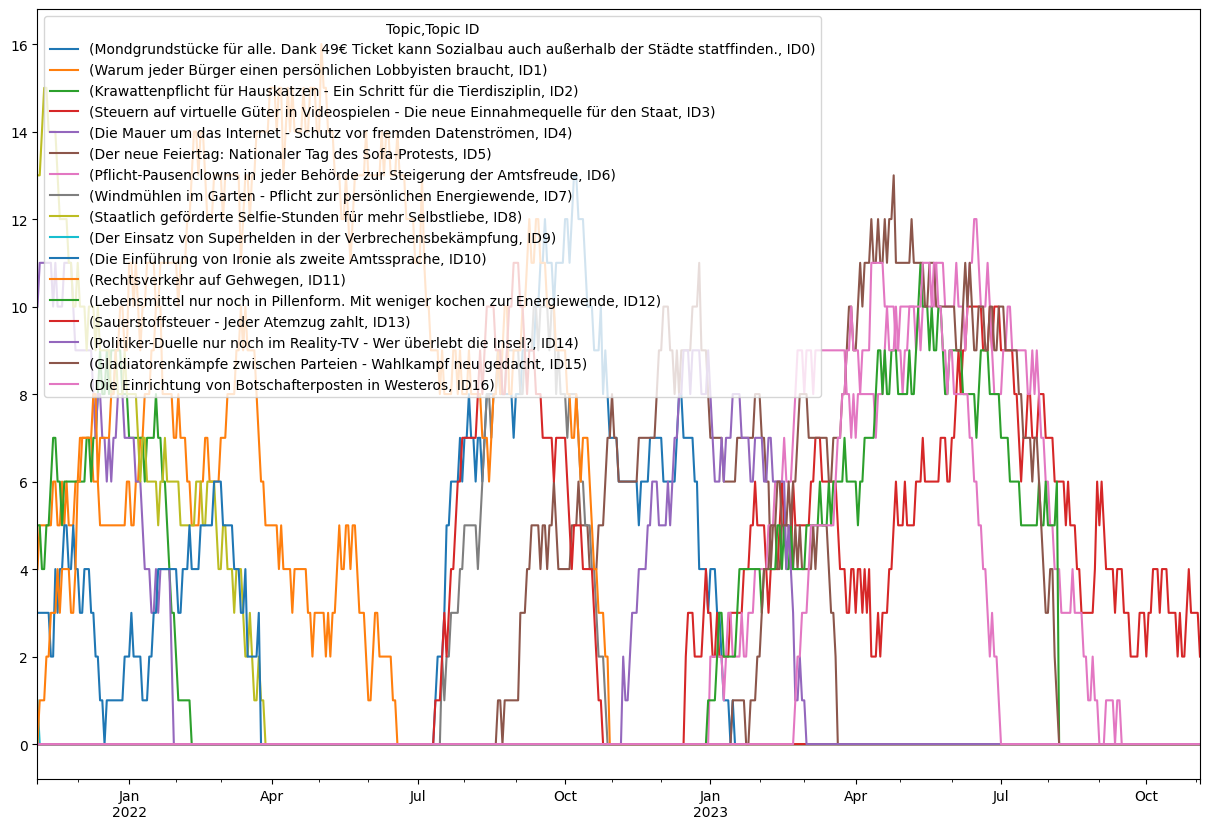

In [151]:
mockup_data.plot()

In [152]:
mockup_data.to_json('./mockup_tot.json')